In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS').getOrCreate()

In [2]:
import pandas as pd

In [3]:
train = spark.read.csv('Datasets/train.csv',inferSchema=True,header=True)

In [4]:
train.registerTempTable("train")

In [5]:
#2.3	Explore the data

print((train.count(), len(train.columns)))


(9557, 143)


In [6]:
import seaborn as sns

sns.countplot("Target", data=train.toPandas())

In [7]:
train.toPandas().select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


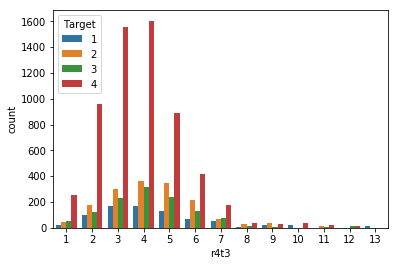

In [8]:
 sns.countplot(x="r4t3",hue="Target",data=train.toPandas())


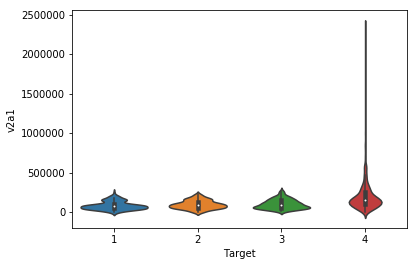

In [9]:
sns.violinplot(x='Target', y='v2a1', data=train.toPandas(), split=True)

In [10]:
#2.4	Verify the data quality

missing = pd.DataFrame(train.toPandas().isnull().sum()).rename(columns = {0: 'missing'})
missing['percent'] = missing['missing'] / len(train.toPandas())
missing.sort_values('percent', ascending = False).head(10)

,missing,percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Id,0,0.000000
hogar_adul,0,0.000000
parentesco10,0,0.000000
parentesco11,0,0.000000
parentesco12,0,0.000000


In [11]:
train.toPandas()["dependency"].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
1.25           18
.80000001      18
3.5            18
2.25           13
.71428573      12
1.2            11
.83333331      11
.22222222      11
1.75           11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

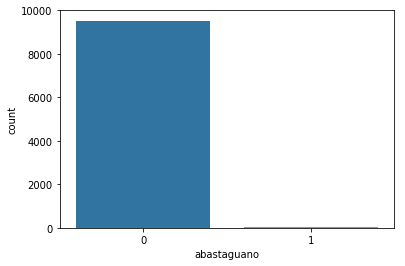

In [12]:
sns.countplot("abastaguano", data=train.toPandas())

In [13]:
#3.1.1	Select rows

train.toPandas()["idhogar"].value_counts()

fd8a6d014    13
0c7436de6    12
ae6cf0558    12
b7a0b59d7    11
3fe29a56b    11
6b35cdcf0    11
4476ccd4c    11
6a96a96c0    10
7cad2d6c4    10
a18c0c0be    10
0fc6c05f7    10
f2a4cd356    10
63f11d6ea    10
9d70c1551     9
ae489f548     9
476b3f2ee     9
322cefd2f     9
9fd143d1f     9
d4e1dc02c     9
efec7e82c     9
1ed926340     9
06ca88023     9
d43a04997     9
dce01dcc3     8
a4a67ad4e     8
a32c04257     8
1c0b1cbd8     8
a2f99b6bc     8
493f97dcb     8
7b7ebaf70     8
             ..
bc10778dc     1
2414080a4     1
30a7d3d70     1
cc3b2206b     1
508d23af7     1
a084df613     1
347141a7b     1
fdf19ce0c     1
2480d7421     1
e79405ae7     1
2fe198a91     1
5e92f4165     1
980b28caa     1
541c6c76c     1
cd3c14d62     1
3fe2124d9     1
883d03f1f     1
e6bf08e4c     1
d9281c805     1
1bb8a3f9c     1
850aca0fa     1
a9b2a46ba     1
58bac08bf     1
1b31fd159     1
0aed192d8     1
15e096859     1
648cfe9a7     1
fa5c14ce6     1
f9480a013     1
668b03bc9     1
Name: idhogar, Length: 2

In [14]:
idhogar_counts = train.toPandas()["idhogar"].value_counts()
train311 = train.toPandas()[~train.toPandas().idhogar.isin(idhogar_counts.index[idhogar_counts>10])]
train311["idhogar"].value_counts()

0fc6c05f7    10
a18c0c0be    10
f2a4cd356    10
63f11d6ea    10
7cad2d6c4    10
6a96a96c0    10
d4e1dc02c     9
9d70c1551     9
ae489f548     9
efec7e82c     9
06ca88023     9
476b3f2ee     9
9fd143d1f     9
d43a04997     9
1ed926340     9
322cefd2f     9
1c0b1cbd8     8
8857dd685     8
4f2bd02b9     8
2f8fab5de     8
7b7ebaf70     8
a32c04257     8
493f97dcb     8
a2f99b6bc     8
da2ecdcfd     8
dce01dcc3     8
cd7c2ef1d     8
a4a67ad4e     8
d4bce9879     7
d8ee41fd9     7
             ..
72f954afb     1
6cf060fb0     1
5ba48ed17     1
a194b02a5     1
b594dc788     1
508d23af7     1
0a3be8b29     1
1d3feb611     1
49824ca39     1
7a883bf28     1
21f4ce7c5     1
bfb873d3a     1
3fe2124d9     1
efe685865     1
72160432f     1
dd93b5a30     1
aa2948d67     1
29414e990     1
1f5ef45bf     1
980b28caa     1
d2e45f8ad     1
1a39f80de     1
fdb188780     1
347141a7b     1
fe30320e4     1
b7c4528a0     1
5438b3a5e     1
ecc08440e     1
3a50d6d95     1
417dbe72b     1
Name: idhogar, Length: 2

In [15]:
#3.1.2	Select columns

train312 = train311.drop(['Id', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'], axis=1)
train312.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,1,0,0,0,0,0,1,0,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,0,0,0,0,0,1,0,67,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,1,0,0,0,0,0,1,0,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,1,0,0,0,0,0,1,0,37,4


In [16]:
#3.2.1	Missing values

missing = pd.DataFrame(train312.isnull().sum()).rename(columns = {0: 'missing'})
missing['percent'] = missing['missing'] / len(train312)
missing.sort_values('percent', ascending = False).head(10)

,missing,percent
rez_esc,7868,0.830308
v18q1,7283,0.768573
v2a1,6803,0.717919
meaneduc,5,0.000528
area1,0,0.000000
parentesco3,0,0.000000
hogar_mayor,0,0.000000
hogar_adul,0,0.000000
hogar_nin,0,0.000000
idhogar,0,0.000000


In [17]:
train321 = train312.drop(['rez_esc', 'v18q1', 'v2a1'], axis=1)
missing = pd.DataFrame(train321.isnull().sum()).rename(columns = {0: 'missing'})
missing['percent'] = missing['missing'] / len(train321)
missing.sort_values('percent', ascending = False).head(10)

,missing,percent
meaneduc,5,0.000528
hacdor,0,0.000000
parentesco4,0,0.000000
hogar_total,0,0.000000
hogar_mayor,0,0.000000
hogar_adul,0,0.000000
hogar_nin,0,0.000000
idhogar,0,0.000000
parentesco12,0,0.000000
parentesco11,0,0.000000


In [18]:
train321.shape

(9476, 130)

In [19]:
train321 = train321.dropna(axis=0, how='any', inplace=False)
train321.shape

(9471, 130)

(array([6690.,    0., 2118.,    0.,  585.,    0.,   53.,    0.,   16.,
           9.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

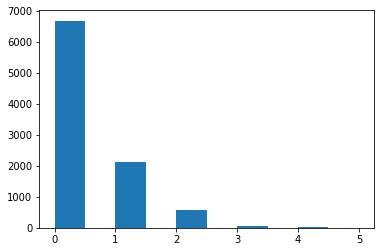

In [20]:
#3.2.2	Outliers and extreme values

import matplotlib.pyplot as plt
plt.hist(train321['r4h1'])

(array([ 950., 3596., 2161., 1989.,  452.,   69.,  114.,   26.,   74.,
          40.]),
 array([0.25 , 0.825, 1.4  , 1.975, 2.55 , 3.125, 3.7  , 4.275, 4.85 ,
        5.425, 6.   ]),
 <a list of 10 Patch objects>)

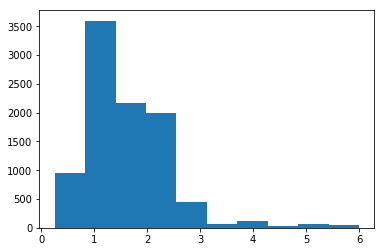

In [21]:
plt.hist(train321['overcrowding'])


(array([4985., 2541., 1381.,    0.,  406.,   92.,    0.,   48.,    0.,
          18.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

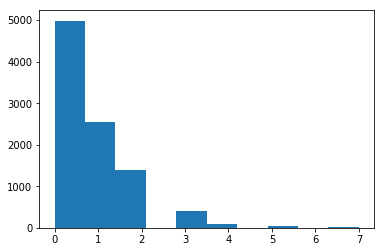

In [22]:
plt.hist(train321['r4t1'])

4     2400
3     2206
5     1627
2     1316
6      868
7      384
1      354
8      111
9       98
10      70
13      17
11      11
15       9
Name: tamviv, dtype: int64

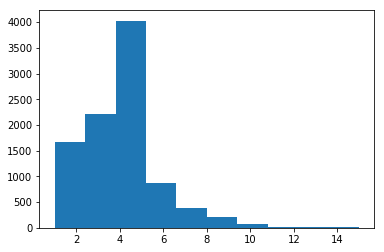

In [23]:
plt.hist(train321['tamviv'])
train321['tamviv'].value_counts()

(array([6.870e+02, 2.623e+03, 3.518e+03, 1.664e+03, 7.650e+02, 1.630e+02,
        3.200e+01, 1.400e+01, 2.000e+00, 3.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

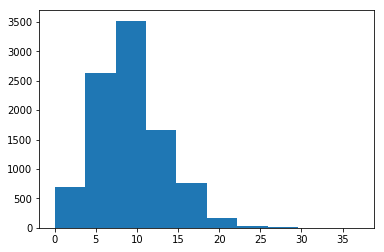

In [24]:
plt.hist(train321['meaneduc'])

(array([ 255.,  656., 1703., 1946., 1722., 1358., 1040.,  524.,  132.,
          67.]),
 array([ 0.  ,  2.15,  4.3 ,  6.45,  8.6 , 10.75, 12.9 , 15.05, 17.2 ,
        19.35, 21.5 ]),
 <a list of 10 Patch objects>)

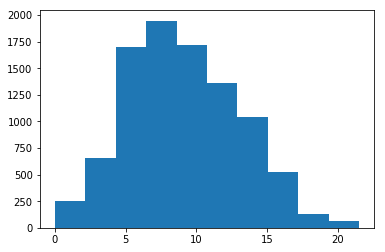

In [25]:
train322 = train321.loc[train321['meaneduc']<train321['meaneduc'].mean()+3*train321['meaneduc'].std()]
plt.hist(train322['meaneduc'])

In [26]:
train322 = train322.loc[train322['tamviv']<train322['tamviv'].mean()+3*train322['tamviv'].std()]
train322.shape

(9296, 130)

In [27]:
#3.2.3	Errors

train322['edjefe'].value_counts()

no     3614
6      1816
11      746
9       467
3       307
15      282
8       247
7       224
5       222
14      197
2       194
17      190
4       135
16      134
yes     123
12      111
10      111
13      103
21       33
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [28]:
train323 = train322
train323['edjefe'][train323['edjefe']=='no']='0'
train323['edjefe'][train323['edjefe']=='yes']='1'
train323['edjefe'].value_counts()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     3614
6     1816
11     746
9      467
3      307
15     282
8      247
7      224
5      222
14     197
2      194
17     190
4      135
16     134
1      123
12     111
10     111
13     103
21      33
18      19
19      14
20       7
Name: edjefe, dtype: int64

In [29]:
train323['edjefa'][train323['edjefa']=='no']='0'
train323['edjefa'][train323['edjefa']=='yes']='1'
train323['edjefa'].value_counts()

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0     6081
6      933
11     382
9      232
8      217
15     179
7      166
5      156
3      152
4      125
14     113
16     106
10      92
2       84
17      74
1       69
12      69
13      52
21       5
19       4
18       3
20       2
Name: edjefa, dtype: int64

In [30]:
#3.3	Construct the data
train323['dependency'].value_counts()

yes          2142
no           1744
.5           1491
2             695
1.5           693
.33333334     594
.66666669     467
8             373
.25           250
3             228
.75            98
.2             90
4              85
.40000001      84
1.3333334      77
2.5            77
5              24
3.5            18
1.25           18
.2857143        9
.80000001       9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [31]:
train33=train323

(array([1744.,   97.,  937., 1499.,  574., 2930.,  703.,  323.,  125.,
         364.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

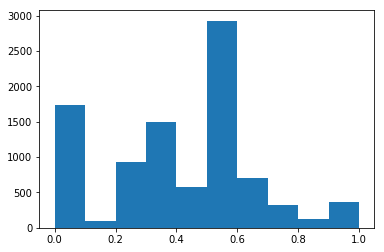

In [32]:
train33['dependency_rate'] = (train33['hogar_nin']+train33['hogar_mayor'])/train33['hogar_total']
plt.hist(train33['dependency_rate'])

In [33]:
#3.4	Integrate various data sources

train_househead = train33[train33.parentesco1==1][['idhogar','Target']]
train_househead.rename(columns={'Target':'target'}, inplace = True)
train_househead.head()

,idhogar,target
0,21eb7fcc1,4
1,0e5d7a658,4
2,2c7317ea8,4
5,2b58d945f,4
8,d6dae86b7,4


In [34]:
train34 = pd.merge(train33, train_househead, how='left', on='idhogar')

#train34[train34.target.isna()][['Target','target']]
notin = train33[~train33.idhogar.isin(train_househead.idhogar)]['idhogar']
#train34[train34.idhogar.isin(notin)][['Target','target']]
train34['target'][train34.idhogar.isin(notin)] = train34[train34.idhogar.isin(notin)].Target
#train34[train34.idhogar.isin(notin)][['Target','target']]

train34['target'].value_counts()


/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


4.0    5862
2.0    1517
3.0    1178
1.0     739
Name: target, dtype: int64

In [35]:
#3.5	Format the data as required
train35 = train34
train35['edjefe'] = train35['edjefe'].astype('int')
train35['edjefa'] = train35['edjefa'].astype('int')
train35['target'] = train35['target'].astype('int')
train35 = train35.drop(['dependency', 'Target', 'idhogar'], axis=1)

train35[['edjefe','edjefa','target']].head(10)

,edjefe,edjefa,target
0,10,0,4
1,12,0,4
2,0,11,4
3,11,0,4
4,11,0,4
5,11,0,4
6,11,0,4
7,9,0,4
8,9,0,4
9,9,0,4


In [38]:
#4.1	Reduce the data
cor = train35.corr()

In [39]:
cor_target = abs(cor["target"]).sort_values(ascending=False)
cor_target

target             1.000000
meaneduc           0.354260
hogar_nin          0.321000
cielorazo          0.309145
escolari           0.307132
r4t1               0.304920
epared3            0.301757
dependency_rate    0.300991
eviv3              0.299340
overcrowding       0.288181
pisomoscer         0.283881
etecho3            0.265908
paredblolad        0.259908
edjefe             0.249817
r4m1               0.247578
v18q               0.237355
rooms              0.228766
instlevel8         0.217168
qmobilephone       0.213707
eviv1              0.213146
epared1            0.211957
r4h1               0.209251
pisocemento        0.206747
etecho1            0.200782
computer           0.185151
eviv2              0.182789
lugar1             0.182032
epared2            0.181862
hogar_adul         0.180718
energcocinar4      0.176571
                     ...   
techootro          0.032637
edjefa             0.029666
paredzinc          0.028782
parentesco11       0.025579
instlevel3         0

In [38]:
cor_target[cor_target>0.2].index

Index(['target', 'meaneduc', 'hogar_nin', 'cielorazo', 'escolari', 'r4t1',
       'epared3', 'dependency_rate', 'eviv3', 'overcrowding', 'pisomoscer',
       'etecho3', 'paredblolad', 'edjefe', 'r4m1', 'v18q', 'rooms',
       'instlevel8', 'qmobilephone', 'eviv1', 'epared1', 'r4h1', 'pisocemento',
       'etecho1'],
      dtype='object')

In [40]:
train41 = train35.iloc[:,train35.columns.isin(cor_target[cor_target>0.2].index)]
train41.head()

,rooms,v18q,r4h1,r4m1,r4t1,escolari,paredblolad,pisomoscer,pisocemento,cielorazo,...,eviv1,eviv3,hogar_nin,edjefe,meaneduc,instlevel8,overcrowding,qmobilephone,dependency_rate,target
0,3,0,0,0,0,10,1,1,0,1,...,1,0,0,10,10.0,0,1.000000,1,0.0,4
1,4,1,0,0,0,12,0,0,0,1,...,0,0,0,12,12.0,1,1.000000,1,1.0,4
2,8,0,0,0,0,11,0,1,0,1,...,0,1,0,0,11.0,0,0.500000,0,1.0,4
3,5,1,0,1,1,9,1,1,0,1,...,0,1,2,11,11.0,0,1.333333,3,0.5,4
4,5,1,0,1,1,11,1,1,0,1,...,0,1,2,11,11.0,0,1.333333,3,0.5,4


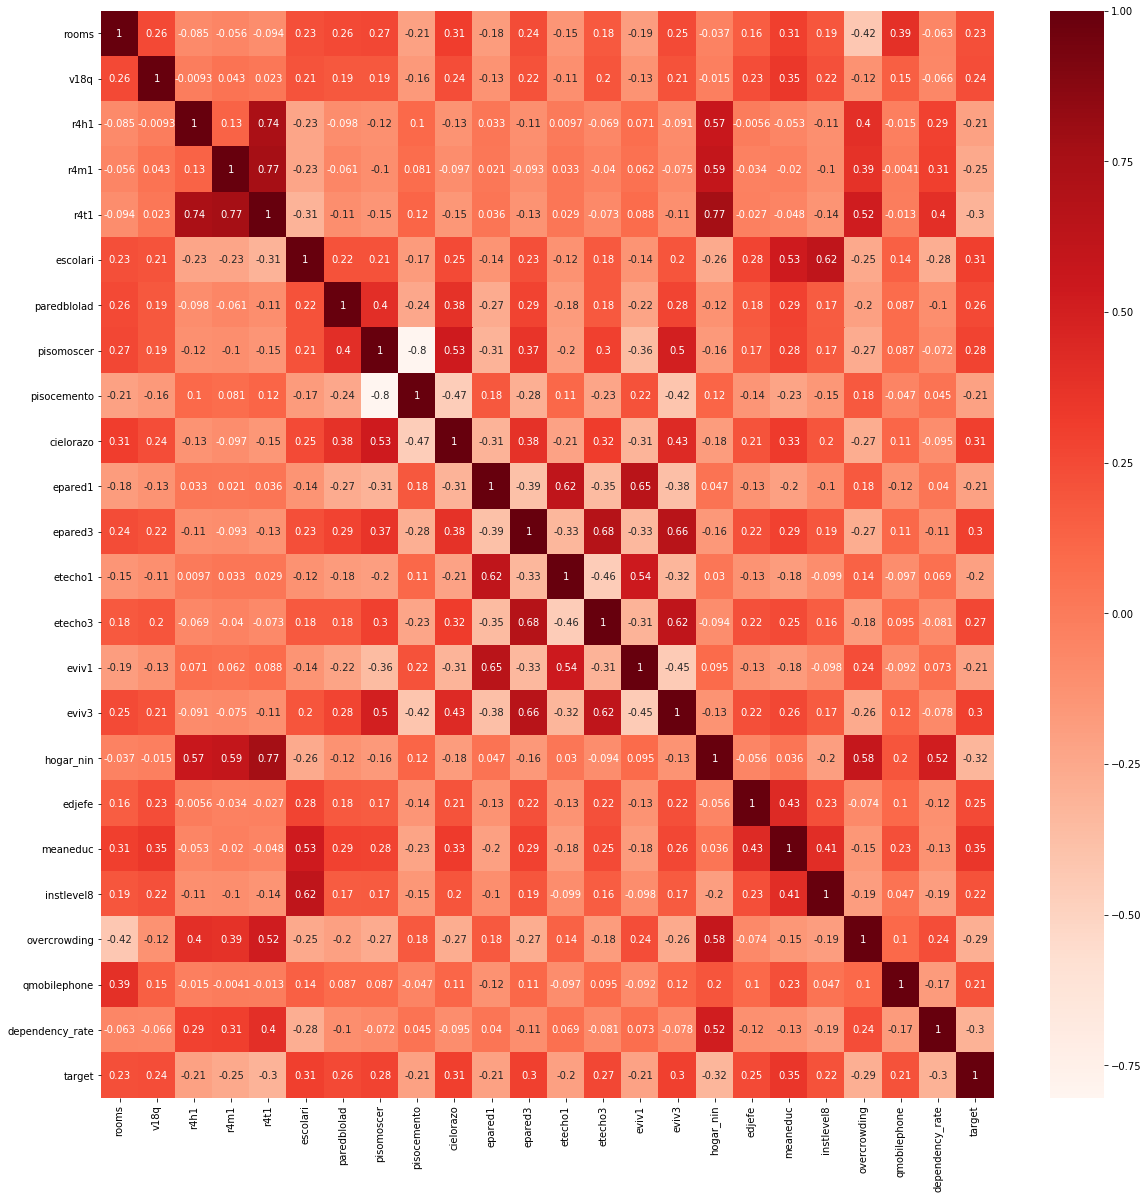

In [40]:
cor41 = train41.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor41, annot=True, cmap=plt.cm.Reds)
plt.show()

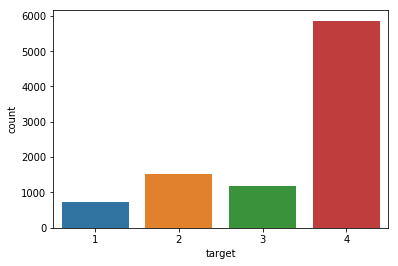

In [41]:
#4.2	Project the data
sns.countplot("target", data=train41)

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
train42, y_resampled = ros.fit_resample(train41, train41['target'])
train42.shape

(23448, 24)

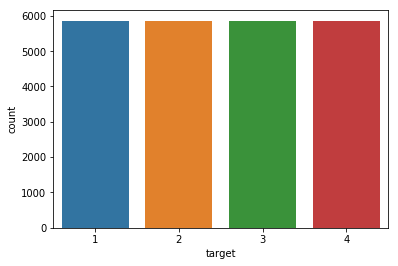

In [43]:
sns.countplot("target", data=train42)

In [44]:
train42.head()

,rooms,v18q,r4h1,r4m1,r4t1,escolari,paredblolad,pisomoscer,pisocemento,cielorazo,...,eviv1,eviv3,hogar_nin,edjefe,meaneduc,instlevel8,overcrowding,qmobilephone,dependency_rate,target
0,3,0,0,0,0,10,1,1,0,1,...,1,0,0,10,10.0,0,1.000000,1,0.0,4
1,4,1,0,0,0,12,0,0,0,1,...,0,0,0,12,12.0,1,1.000000,1,1.0,4
2,8,0,0,0,0,11,0,1,0,1,...,0,1,0,0,11.0,0,0.500000,0,1.0,4
3,5,1,0,1,1,9,1,1,0,1,...,0,1,2,11,11.0,0,1.333333,3,0.5,4
4,5,1,0,1,1,11,1,1,0,1,...,0,1,2,11,11.0,0,1.333333,3,0.5,4


In [45]:
#6.1	Conduct exploratory analysis and discuss
train61_pandas = train42
#train61_pandas = train42.sort_values("target")

#train61_pandas[['targetIndex']] = train61_pandas[['targetIndex']]-1

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler



train61 = spark.createDataFrame(train61_pandas)


#train61 = train61.withColumn("target", train61.target.astype("double"))

print(train61.columns)

#train61.target = train61.target-1
print(train61.head())
#assembler = VectorAssembler(
 # inputCols = data.columns, outputCol="features")

#dtc = DecisionTreeClassifier(labelCol='target')
#dtc_model = dtc.fit()


['rooms', 'v18q', 'r4h1', 'r4m1', 'r4t1', 'escolari', 'paredblolad', 'pisomoscer', 'pisocemento', 'cielorazo', 'epared1', 'epared3', 'etecho1', 'etecho3', 'eviv1', 'eviv3', 'hogar_nin', 'edjefe', 'meaneduc', 'instlevel8', 'overcrowding', 'qmobilephone', 'dependency_rate', 'target']
Row(rooms=3, v18q=0, r4h1=0, r4m1=0, r4t1=0, escolari=10, paredblolad=1, pisomoscer=1, pisocemento=0, cielorazo=1, epared1=0, epared3=0, etecho1=1, etecho3=0, eviv1=1, eviv3=0, hogar_nin=0, edjefe=10, meaneduc=10.0, instlevel8=0, overcrowding=1.0, qmobilephone=1, dependency_rate=0.0, target=4)


In [47]:
assembler = VectorAssembler(
  inputCols=['rooms',
             'v18q',
             'r4h1',
             'r4m1',
             'r4t1',
             'escolari',
             'paredblolad',
             'pisomoscer',
             'pisocemento',
             'cielorazo',
             'epared1',
             'epared3',
             'etecho1',
             'etecho3',
             'eviv1',
             'eviv3',
             'hogar_nin',
             'edjefe',
             'meaneduc',
             'instlevel8',
             'overcrowding',
             'qmobilephone',
             'dependency_rate'],
              outputCol="features")

In [48]:
output61 = assembler.transform(train61)
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="target", outputCol="targetIndex")
output_fixed = indexer.fit(output61).transform(output61)
final_data = output_fixed.select("features",'targetIndex')

In [49]:
print(output_fixed.printSchema())
print(final_data.head())

root
 |-- rooms: long (nullable = true)
 |-- v18q: long (nullable = true)
 |-- r4h1: long (nullable = true)
 |-- r4m1: long (nullable = true)
 |-- r4t1: long (nullable = true)
 |-- escolari: long (nullable = true)
 |-- paredblolad: long (nullable = true)
 |-- pisomoscer: long (nullable = true)
 |-- pisocemento: long (nullable = true)
 |-- cielorazo: long (nullable = true)
 |-- epared1: long (nullable = true)
 |-- epared3: long (nullable = true)
 |-- etecho1: long (nullable = true)
 |-- etecho3: long (nullable = true)
 |-- eviv1: long (nullable = true)
 |-- eviv3: long (nullable = true)
 |-- hogar_nin: long (nullable = true)
 |-- edjefe: long (nullable = true)
 |-- meaneduc: double (nullable = true)
 |-- instlevel8: long (nullable = true)
 |-- overcrowding: double (nullable = true)
 |-- qmobilephone: long (nullable = true)
 |-- dependency_rate: double (nullable = true)
 |-- target: long (nullable = true)
 |-- features: vector (nullable = true)
 |-- targetIndex: double (nullable = true)


In [50]:
dtc = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features')
dtc_model = dtc.fit(final_data)


In [51]:
print(dtc_model.toDebugString)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_45149b762a15a1ed08fd) of depth 5 with 63 nodes
  If (feature 18 <= 11.0)
   If (feature 4 <= 1.0)
    If (feature 18 <= 6.4000001)
     If (feature 17 <= 4.0)
      If (feature 11 <= 0.0)
       Predict: 3.0
      Else (feature 11 > 0.0)
       Predict: 2.0
     Else (feature 17 > 4.0)
      If (feature 20 <= 1.6666666)
       Predict: 2.0
      Else (feature 20 > 1.6666666)
       Predict: 1.0
    Else (feature 18 > 6.4000001)
     If (feature 16 <= 0.0)
      If (feature 21 <= 2.0)
       Predict: 0.0
      Else (feature 21 > 2.0)
       Predict: 0.0
     Else (feature 16 > 0.0)
      If (feature 18 <= 8.8571424)
       Predict: 2.0
      Else (feature 18 > 8.8571424)
       Predict: 0.0
   Else (feature 4 > 1.0)
    If (feature 17 <= 3.0)
     If (feature 21 <= 3.0)
      If (feature 22 <= 0.5)
       Predict: 1.0
      Else (feature 22 > 0.5)
       Predict: 3.0
     Else (feature 21 > 3.0)
      If (feature 18 <= 8.5)
   

In [45]:
import json


def parse(lines):
	block = []
	while lines :
		if lines[0].startswith('If'):
			bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
			block.append({'name':bl, 'children':parse(lines)})
				
				
			if lines[0].startswith('Else'):
				be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
				block.append({'name':be, 'children':parse(lines)})
		elif not lines[0].startswith(('If','Else')):
			block2 = lines.pop(0)
			block.append({'name':block2})
		else:
			break	
	return block
	
	# Convert Tree to JSON
def tree_json(tree):
	data = []
	for line in tree.splitlines() : 
		if line.strip():
			line = line.strip()
			data.append(line)
		else : break
		if not line : break
	res = []
	res.append({'name':'Root', 'children':parse(data[1:])})
	with open('Decision-Tree-Visualization-Spark-master/data/structure.json', 'w') as outfile:
		json.dump(res[0], outfile)
	print ('Conversion Success !')

def tree_feature_json(tree, columns):
    tree_str = tree
    for i in range(len(columns)-1, -1, -1):
        tree_str = tree_str.replace("feature "+str(i), columns[i])
    tree_json(tree_str)

In [53]:
tree_feature_json(dtc_model.toDebugString, train61.columns)

Conversion Success !


In [50]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'targetIndex')

In [55]:
dtc3 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=3)
dtc_model3 = dtc3.fit(final_data)

tree_feature_json(dtc_model3.toDebugString, train61.columns)

dtc_predictions3 = dtc_model3.transform(final_data)
print(my_binary_eval.evaluate(dtc_predictions3))

Conversion Success !
0.6196222022705556


In [56]:
dtc4 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=4)
dtc_model4 = dtc4.fit(final_data)

tree_feature_json(dtc_model4.toDebugString, train61.columns)

dtc_predictions4 = dtc_model4.transform(final_data)
print(my_binary_eval.evaluate(dtc_predictions4))

Conversion Success !
0.6932241509221361


In [57]:
dtc5 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=5)
dtc_model5 = dtc5.fit(final_data)

tree_feature_json(dtc_model5.toDebugString, train61.columns)

dtc_predictions5 = dtc_model5.transform(final_data)
print(my_binary_eval.evaluate(dtc_predictions5))

Conversion Success !
0.7228475063695365


In [58]:
final_data.head()

Row(features=SparseVector(23, {0: 3.0, 5: 10.0, 6: 1.0, 7: 1.0, 9: 1.0, 12: 1.0, 14: 1.0, 17: 10.0, 18: 10.0, 20: 1.0, 21: 1.0}), targetIndex=0.0)

In [30]:
dtc63 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=4, minInstancesPerNode=2000)
dtc_model63 = dtc63.fit(final_data)

tree_feature_json(dtc_model63.toDebugString, train61.columns)

dtc_predictions63 = dtc_model63.transform(final_data)
print(my_binary_eval.evaluate(dtc_predictions63))

Conversion Success !
0.6614060054361501


In [51]:
#7.1	Create and justify test designs
train_data71,test_data71 = final_data.randomSplit([0.9,0.1])
print((train_data71.count(), len(train_data71.columns)))
print((test_data71.count(), len(test_data71.columns)))

(21116, 2)
(2332, 2)


In [52]:
#7.2	Conduct data mining
import time

start = time.time()

dtc_tree_72 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=4, minInstancesPerNode=2000)
dtc_tree_model_72 = dtc_tree_72.fit(train_data71)


tree_feature_json(dtc_tree_model_72.toDebugString, train61.columns)

dtc_tree_predictions_72 = dtc_tree_model_72.transform(test_data71)


end = time.time()
duration = end-start

print("Training duration: ", duration, " seconds")
print("Accuracy: ", my_binary_eval.evaluate(dtc_tree_predictions_72))


Conversion Success !
Training duration:  5.942919492721558  seconds
Accuracy:  0.6604052982951296


In [53]:
from pyspark.ml.classification import RandomForestClassifier

start = time.time()

dtc_forest_72 = RandomForestClassifier(labelCol='targetIndex',featuresCol='features')
dtc_forest_model_72 = dtc_forest_72.fit(train_data71)



dtc_forest_predictions_72 = dtc_forest_model_72.transform(test_data71)


end = time.time()
duration = end-start

print("Training duration: ", duration, " seconds")
print("Accuracy: ", my_binary_eval.evaluate(dtc_forest_predictions_72))

Training duration:  5.11834454536438  seconds
Accuracy:  0.8169847573073314


In [63]:
from pyspark.ml.regression import LinearRegression

lr_72 = LinearRegression(labelCol='targetIndex',featuresCol='features')
lrModel = lr_72.fit(train_data71)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)



Coefficients: [0.0009828415819616704,-0.21103788739958937,0.0012889912552341727,0.04936609975714846,0.0246968843735806,-0.0036143051296167236,-0.025690152259485743,0.014115077305960214,0.07810709002267208,-0.12103414231748266,-0.00875796239732314,-0.043238130162976,0.2836731759114449,-0.10790095007258128,-0.20945422441729802,-0.07341446633215762,0.13185789815239937,-0.024798793047333675,-0.042555583628898726,-0.18361475141931782,-0.010134186346290984,-0.1166997860685525,0.14257847353910025]
Intercept: 2.111923968647216
numIterations: 25
objectiveHistory: [0.5, 0.4007214492062887, 0.39381309946713405, 0.3851068905426769, 0.38397138889916316, 0.3831757341032114, 0.38283247997072767, 0.382635903120909, 0.38252914935067106, 0.38251765726246334, 0.38249941898730966, 0.38249833793252375, 0.38249779168800413, 0.38249761154239637, 0.38249760087493545, 0.38249759304627173, 0.38249759076923295, 0.3824975895530216, 0.3824975890897713, 0.3824975887109978, 0.38249758856016736, 0.382497588551308, 0.

In [64]:
#print(trainingSummary.pValues())

In [54]:
import statsmodels.api as sm
Y72 = train42['target']
X72 = train42.drop('target', axis=1)

start = time.time()
mod = sm.OLS(Y72, X72)    # Describe model
res = mod.fit()       # Fit model
end = time.time()
duration = end-start
print("Training duration: ", duration, " seconds")
print(res.summary())

Training duration:  0.08398771286010742  seconds
                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              7570.
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                        0.00
Time:                        07:02:18   Log-Likelihood:                         -32356.
No. Observations:               23448   AIC:                                  6.476e+04
Df Residuals:                   23426   BIC:                                  6.493e+04
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025

In [66]:
#7.3	Search for patterns
res.pvalues.sort_values()

rooms              1.220786e-252
overcrowding       1.228945e-209
hogar_nin          6.087467e-164
meaneduc           1.159192e-149
qmobilephone       2.599874e-125
edjefe              1.534896e-68
pisomoscer          3.262884e-43
pisocemento         4.723147e-39
etecho1             6.162458e-31
eviv1               6.983574e-20
dependency_rate     3.122111e-18
v18q                2.463961e-17
eviv3               1.474148e-14
escolari            2.608147e-14
epared3             1.287030e-13
r4t1                9.200465e-10
r4m1                4.101946e-08
paredblolad         5.129869e-08
cielorazo           6.803918e-07
etecho3             1.749606e-06
epared1             8.835381e-05
instlevel8          3.367022e-01
r4h1                8.559934e-01
dtype: float64

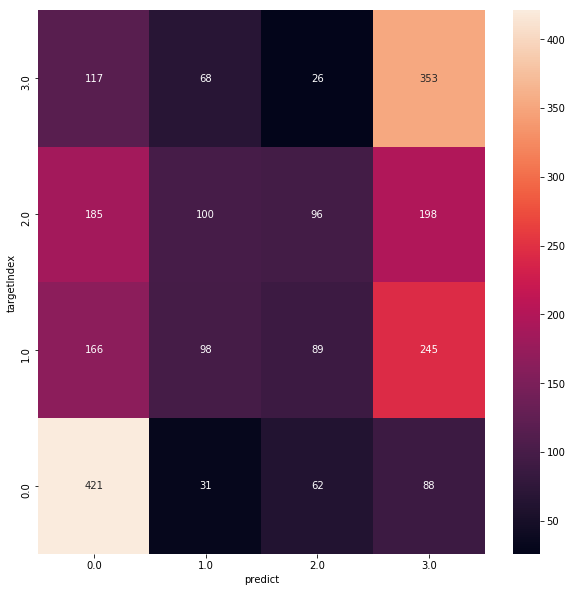

In [33]:
#8.2	Visualize the data, results, models, and patterns

from sklearn.metrics import confusion_matrix

prediction82 = dtc_tree_predictions_72.toPandas()

c82 = pd.crosstab(prediction82["targetIndex"], prediction82["prediction"])
c82.columns.name = 'predict'

plt.figure(figsize=(10,10))
#sns.set(font_scale=1.5)
sns.heatmap(c82, annot=True, fmt='d').invert_yaxis()
plt.show()

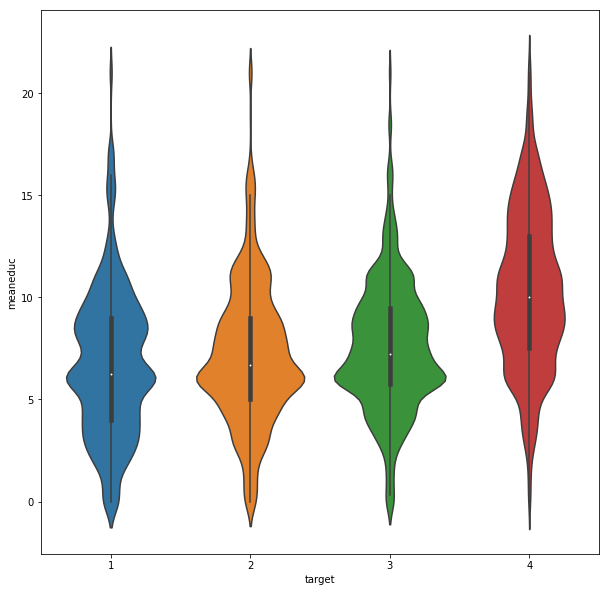

In [34]:
plt.figure(figsize=(10,10))

sns.violinplot(x='target', y='meaneduc', data=train42, split=True)

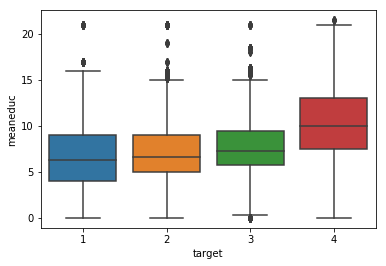

In [35]:
sns.boxplot(x = 'target', y = 'meaneduc', data = train42)

In [36]:
train82=train42

In [37]:
train82['hogar_nin'].value_counts()

train82['more_than_one_child']=0
train82['more_than_one_child'][train42['hogar_nin']>1]=1

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


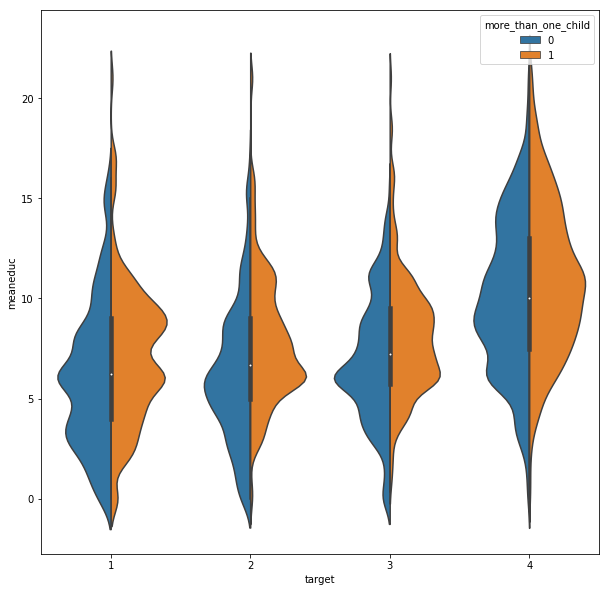

In [38]:
plt.figure(figsize=(10,10))

sns.violinplot(x='target', y='meaneduc', hue='more_than_one_child', data=train42, split=True)

In [40]:
#8.3	Interpret the results, models, and patterns
train82.mean()

rooms                  4.665174
v18q                   0.146750
r4h1                   0.480212
r4m1                   0.520002
r4t1                   1.000213
escolari               5.997143
paredblolad            0.496119
pisomoscer             0.595872
pisocemento            0.284374
cielorazo              0.560048
epared1                0.152039
epared3                0.454197
etecho1                0.185432
etecho3                0.474497
eviv1                  0.146665
eviv3                  0.533137
hogar_nin              1.674343
edjefe                 3.992195
meaneduc               7.939123
instlevel8             0.076169
overcrowding           1.743139
qmobilephone           2.520130
dependency_rate        0.460306
target                 2.500000
more_than_one_child    0.509937
dtype: float64

In [43]:
res.params

rooms                  0.165970
v18q                   0.164026
r4h1                   0.002064
r4m1                  -0.041860
r4t1                  -0.039796
escolari               0.014551
paredblolad            0.075511
pisomoscer             0.318532
pisocemento            0.269203
cielorazo              0.078584
epared1                0.096510
epared3                0.140544
etecho1               -0.262906
etecho3                0.096432
eviv1                  0.234846
eviv3                  0.152625
hogar_nin             -0.220699
edjefe                 0.027524
meaneduc               0.057641
instlevel8            -0.033520
overcrowding           0.274840
qmobilephone           0.139855
dependency_rate        0.284402
more_than_one_child   -0.114636
dtype: float64

In [45]:
train82.mean() * res.params

cielorazo              0.044011
dependency_rate        0.130912
edjefe                 0.109882
epared1                0.014673
epared3                0.063835
escolari               0.087263
etecho1               -0.048751
etecho3                0.045757
eviv1                  0.034444
eviv3                  0.081370
hogar_nin             -0.369525
instlevel8            -0.002553
meaneduc               0.457618
more_than_one_child   -0.058457
overcrowding           0.479085
paredblolad            0.037462
pisocemento            0.076554
pisomoscer             0.189804
qmobilephone           0.352454
r4h1                   0.000991
r4m1                  -0.021767
r4t1                  -0.039805
rooms                  0.774277
target                      NaN
v18q                   0.024071
dtype: float64

In [55]:
#8.4	Assess and evaluate results, models, and patterns

from statsmodels.tools import eval_measures

y_predict_regression = res.predict(X72)

eval_measures.meanabs(Y72, y_predict_regression)

0.789105825039526

In [59]:
print(eval_measures.meanabs(dtc_tree_predictions_72.toPandas()["targetIndex"], dtc_tree_predictions_72.toPandas()["prediction"]))
print(eval_measures.meanabs(dtc_forest_predictions_72.toPandas()["targetIndex"], dtc_forest_predictions_72.toPandas()["prediction"]))

0.9095197255574614
0.6578044596912521


In [36]:
#8.5	Iterate prior steps as required
from imblearn.over_sampling import RandomOverSampler
y85 = train35['target']
X85 = train35.drop('target', axis=1)

ros = RandomOverSampler(random_state=0)
X85, y85 = ros.fit_resample(X85, y85)
print(X85.shape)
print(y85.shape)

(23448, 128)
(23448,)


In [45]:


start = time.time()
mod = sm.OLS(y85, X85)    
res85 = mod.fit()       
end = time.time()
duration = end-start
print("Training duration: ", duration, " seconds")
print(res85.summary())

Training duration:  1.0709021091461182  seconds
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 07 Jun 2020   Prob (F-statistic):               0.00
Time:                        07:16:20   Log-Likelihood:                -30563.
No. Observations:               23448   AIC:                         6.134e+04
Df Residuals:                   23343   BIC:                         6.218e+04
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [46]:
res85.pvalues.sort_values()

qmobilephone       5.737586e-89
meaneduc           7.222294e-49
hogar_adul         2.018711e-48
v18q               1.278156e-42
hogar_nin          1.615718e-25
edjefe             4.860452e-24
energcocinar2      2.012826e-19
hogar_mayor        3.627654e-19
tipovivi3          6.814604e-18
energcocinar3      1.920862e-16
parentesco4        4.074084e-16
etecho3            7.666749e-16
tipovivi2          3.698825e-15
television         2.483107e-14
abastaguafuera     5.461138e-14
estadocivil6       7.358350e-14
epared3            8.159167e-14
lugar1             1.728478e-13
lugar6             4.373385e-13
etecho2            6.190115e-13
eviv1              1.060494e-12
area2              2.790475e-12
tamviv             2.022476e-09
age                2.169642e-09
male               4.152785e-09
female             8.123203e-09
eviv3              2.508719e-08
dependency_rate    3.101576e-08
parentesco12       5.238471e-08
hacdor             5.732991e-08
                       ...     
parentes

In [47]:
abs(X85.corr()['escolari']).sort_values(ascending=False)

escolari           1.000000
instlevel1         0.634802
estadocivil1       0.597442
instlevel8         0.543657
meaneduc           0.502300
instlevel5         0.369087
instlevel2         0.359996
r4t1               0.297023
dependency_rate    0.286150
edjefe             0.272987
estadocivil7       0.263401
instlevel4         0.246765
r4m1               0.226397
r4h1               0.221519
rooms              0.220402
hogar_nin          0.220071
age                0.218037
cielorazo          0.217700
computer           0.214397
instlevel9         0.212783
overcrowding       0.210728
paredblolad        0.204181
epared3            0.200128
pisomoscer         0.186150
v18q               0.182229
qmobilephone       0.177127
eviv3              0.171440
estadocivil3       0.171324
parentesco6        0.163475
etecho3            0.154508
                     ...   
sanitario1         0.038725
pisonatur          0.038083
techootro          0.037125
v14a               0.036812
noelec             0

In [37]:
def feature_selection_by_p_value(X, y):
    mod = sm.OLS(y, X)
    res = mod.fit()
    if sum(res.pvalues[res.pvalues>0.05])>0:
        print(sum(res.pvalues>0.05))
        columns = res.pvalues[res.pvalues>0.05].index
        X = X.drop(columns, axis=1)
        X = feature_selection_by_p_value(X, y)
    else:
        print(X.head())
        return X
    return X

In [38]:
import statsmodels.api as sm
X85 = feature_selection_by_p_value(X85, y85)

38
12
3
   hacdor  rooms  hacapo  refrig  v18q  r4h1  r4m1  r4m2  r4m3  r4t1  \
0       0      3       0       1     0     0     0     0     0     0   
1       0      4       0       1     1     0     0     0     0     0   
2       0      8       0       1     0     0     0     1     1     0   
3       0      5       0       1     1     0     1     1     2     1   
4       0      5       0       1     1     0     1     1     2     1   

        ...         overcrowding  tipovivi2  tipovivi3  television  \
0       ...             1.000000          0          1           0   
1       ...             1.000000          0          1           0   
2       ...             0.500000          0          0           0   
3       ...             1.333333          0          1           0   
4       ...             1.333333          0          1           0   

   qmobilephone  lugar1  lugar6  area2  age  dependency_rate  
0             1       1       0      0   43              0.0  
1           

In [39]:
X85["target"] = y85



In [40]:
train85 = spark.createDataFrame(X85)
print(train85.columns)

['hacdor', 'rooms', 'hacapo', 'refrig', 'v18q', 'r4h1', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'tamhog', 'tamviv', 'hhsize', 'paredblolad', 'pareddes', 'paredfibras', 'paredother', 'pisocemento', 'pisoother', 'techozinc', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'sanitario1', 'sanitario5', 'sanitario6', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu5', 'elimbasu6', 'epared3', 'etecho2', 'etecho3', 'eviv1', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil4', 'estadocivil6', 'estadocivil7', 'parentesco4', 'parentesco6', 'parentesco7', 'parentesco10', 'parentesco12', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'overcrowding', 'tipovivi2', 'tipovivi3', 'television', 'qmobilephone', 'lugar1', 'lugar6', 'area2', 'age', 'dependency_rate', 'target']


In [41]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

assembler85 = VectorAssembler(
  inputCols=['hacdor', 'rooms', 'hacapo', 'refrig', 'v18q', 'r4h1', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'tamhog', 'tamviv', 'hhsize', 'paredblolad', 'pareddes', 'paredfibras', 'paredother', 'pisocemento', 'pisoother', 'techozinc', 'techootro', 'cielorazo', 'abastaguadentro', 'abastaguafuera', 'sanitario1', 'sanitario5', 'sanitario6', 'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu6', 'epared3', 'etecho2', 'etecho3', 'eviv1', 'eviv3', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil4', 'estadocivil6', 'estadocivil7', 'parentesco4', 'parentesco6', 'parentesco7', 'parentesco10', 'parentesco12', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'overcrowding', 'tipovivi2', 'tipovivi3', 'television', 'qmobilephone', 'lugar1', 'lugar6', 'area2', 'age', 'dependency_rate'],
              outputCol="features")

In [42]:
output85 = assembler85.transform(train85)
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="target", outputCol="targetIndex")
output_fixed85 = indexer.fit(output85).transform(output85)
final_data85 = output_fixed85.select("features",'targetIndex')

In [43]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'targetIndex')

In [46]:
train_data85,test_data85 = final_data85.randomSplit([0.9,0.1])
print((train_data85.count(), len(train_data85.columns)))
print((test_data85.count(), len(test_data85.columns)))

(21120, 2)
(2328, 2)


In [47]:
import time

start = time.time()

dtc_tree_85 = DecisionTreeClassifier(labelCol='targetIndex',featuresCol='features', maxDepth=4, minInstancesPerNode=2000)
dtc_tree_model_85 = dtc_tree_85.fit(train_data85)


tree_feature_json(dtc_tree_model_85.toDebugString, X85.columns)

dtc_tree_predictions_85 = dtc_tree_model_85.transform(test_data85)


end = time.time()
duration = end-start

print("Training duration: ", duration, " seconds")
print("Accuracy: ", my_binary_eval.evaluate(dtc_tree_predictions_85))

Conversion Success !
Training duration:  5.613530158996582  seconds
Accuracy:  0.6623052003007365


In [48]:

start = time.time()

dtc_forest_85 = RandomForestClassifier(labelCol='targetIndex',featuresCol='features')
dtc_forest_model_85 = dtc_forest_85.fit(train_data85)



dtc_forest_predictions_85 = dtc_forest_model_85.transform(test_data85)


end = time.time()
duration = end-start

print("Training duration: ", duration, " seconds")
print("Accuracy: ", my_binary_eval.evaluate(dtc_forest_predictions_85))

Training duration:  4.244594097137451  seconds
Accuracy:  0.8091617363989552
